In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import distance
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy import linalg

%matplotlib notebook

In [2]:
colors = ['navy', 'turquoise', 'darkorange']
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

## Import and visualize the first 2 features of the Iris dataset

<IPython.core.display.Javascript object>


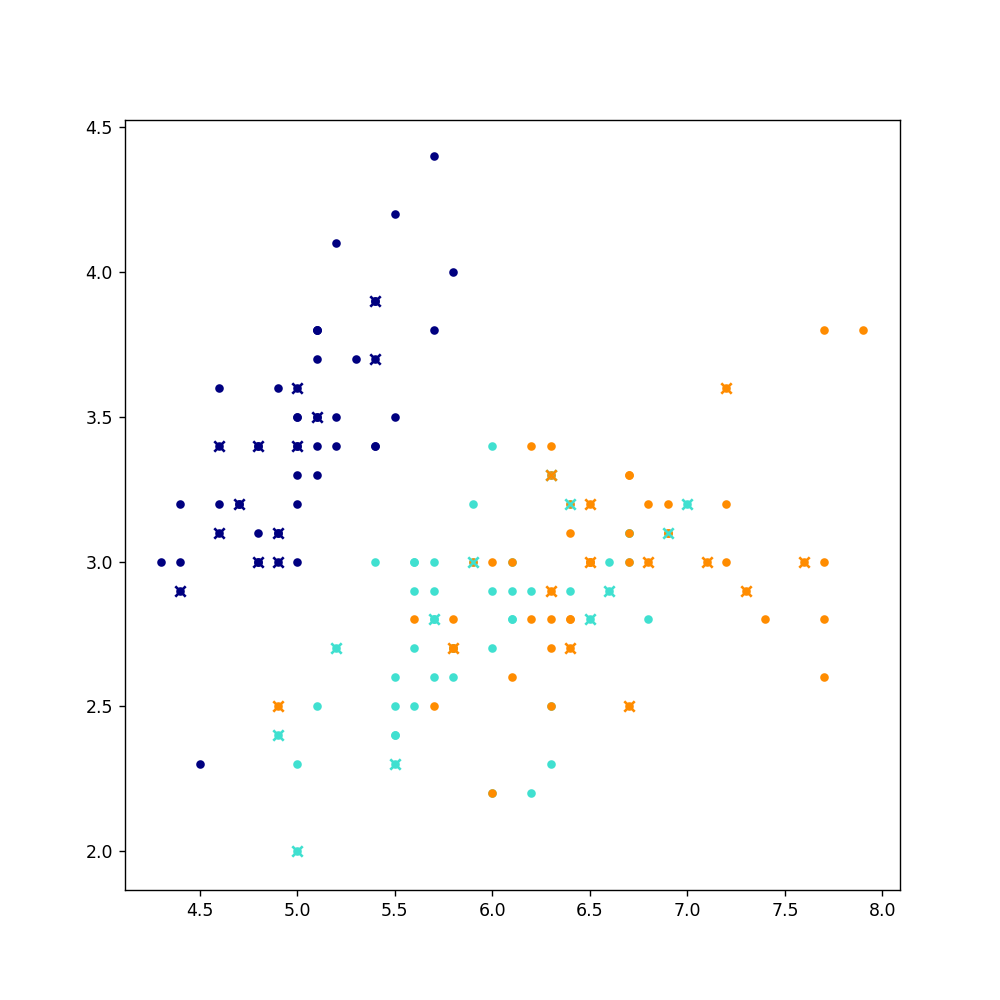

In [4]:
iris = datasets.load_iris()

skf = StratifiedKFold(n_splits=4)
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

X = iris.data
X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))
plt.figure(figsize=(8,8))
for n, color in enumerate(colors):
    data = iris.data[iris.target == n]
    plt.scatter(data[:, 0], data[:, 1], s=15.5, color=color,
                label=iris.target_names[n])
for n, color in enumerate(colors):
    data = X_test[y_test == n]
    plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
plt.show()

## Fit and visualize the results of 4 Gaussian Mixture Models (GMM) with different covariance matrices (spherical, diagonal, tied, full) on the Iris dataset  

<IPython.core.display.Javascript object>


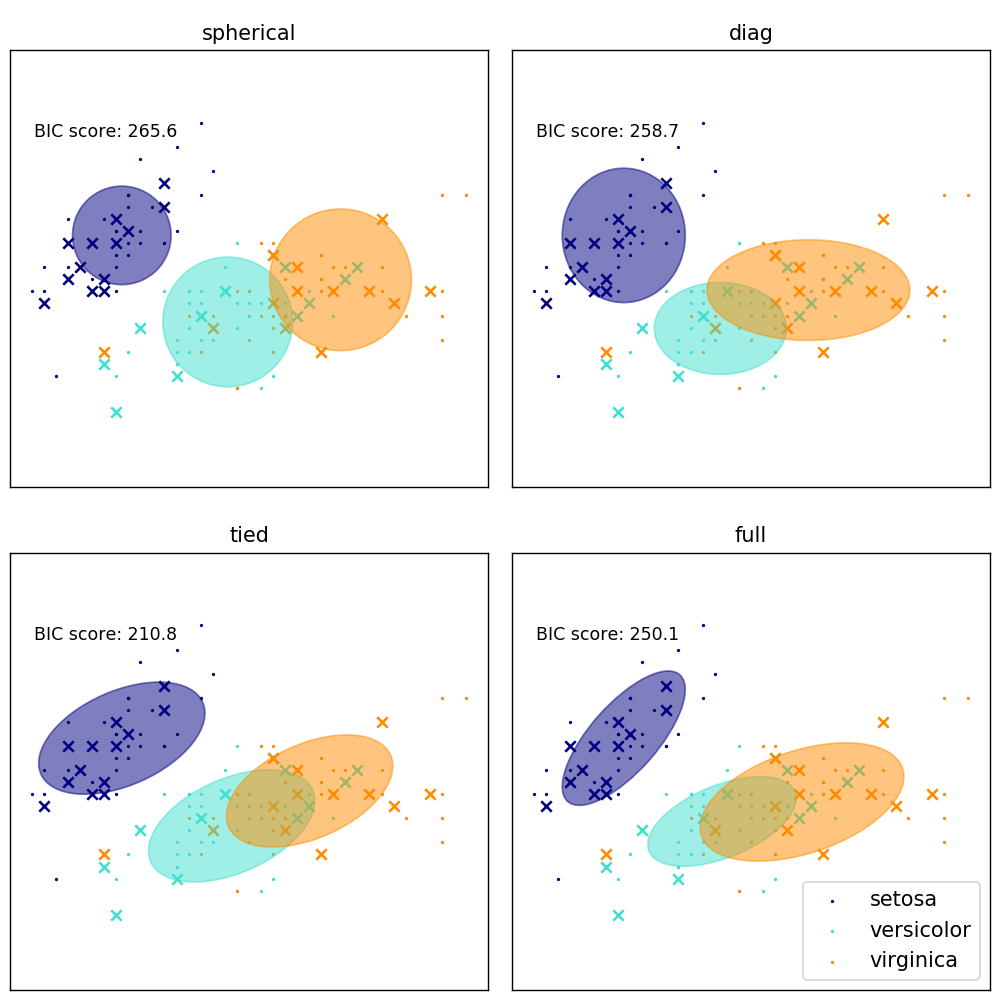

In [5]:
# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)
plt.figure(figsize=(4 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)


    plt.text(0.05, 0.8, 'BIC score: %.1f' % estimator.bic(X_test),
             transform=h.transAxes)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()

## Visualize the probabilities of belonging to cluster 2 for all points of the Iris dataset using the 4 trained Gaussian Mixture Models (GMM) from above. (For each point, soft clustering techniques such as GMM return a probability of belonging to each cluster, with brighter colors representing higher probabilities and darker colors representing lower probabilities)

<IPython.core.display.Javascript object>


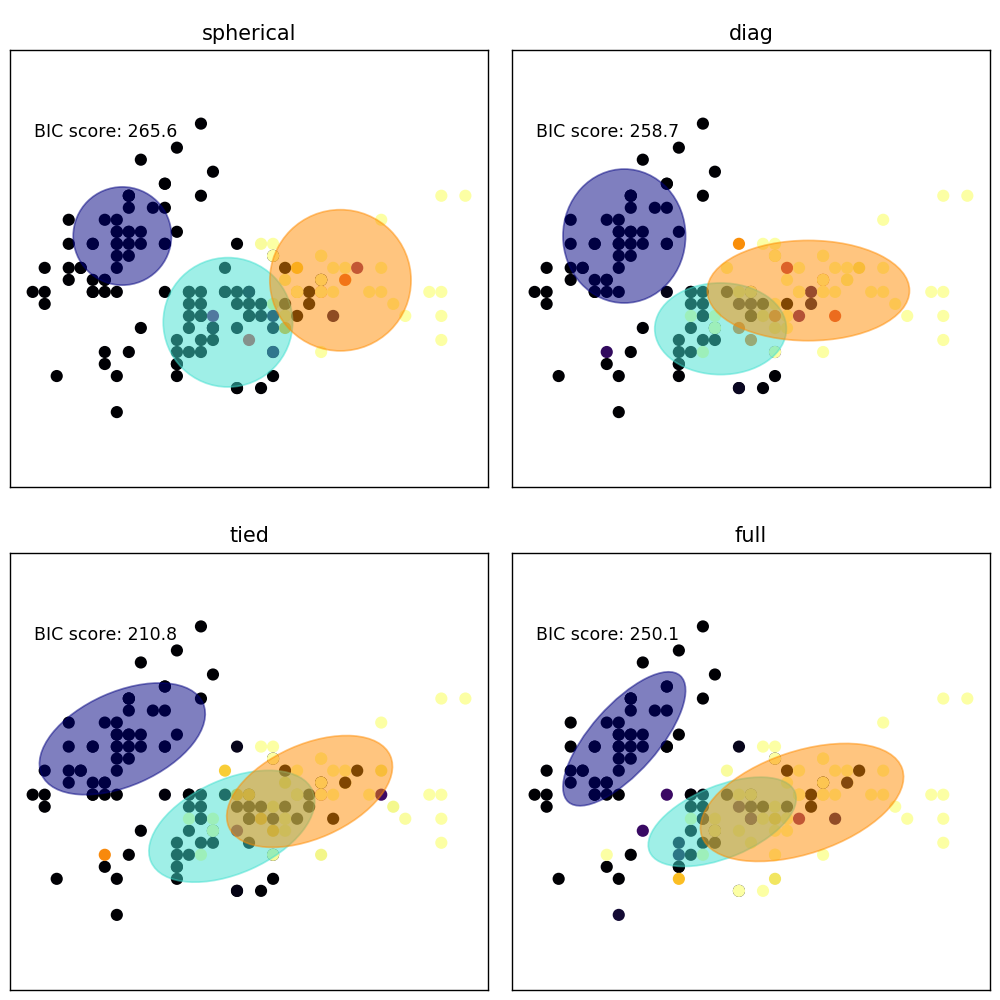

In [6]:
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=30, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(4 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    class2_probabilities = estimator.predict_proba(X_train)[:,2]
    data = X_train
    plt.scatter(data[:,0], data[:,1], marker='o', norm = mpl.colors.Normalize(0,1), c=class2_probabilities, cmap="inferno")
 
    class2_probabilities = estimator.predict_proba(X_test)[:,2]
    data = X_test
    plt.scatter(data[:,0], data[:,1], marker='o', norm = mpl.colors.Normalize(0,1), c=class2_probabilities, cmap="inferno")
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.text(0.05, 0.8, 'BIC score: %.1f' % estimator.bic(X_test),
             transform=h.transAxes)
plt.show()

## We plot the iterations of the EM algorithm with random initialization of the parameters on the Iris dataset for different covariances matrices as shown above

### Visualization of the iterations for a GMM with a spherical covariance matric

<IPython.core.display.Javascript object>


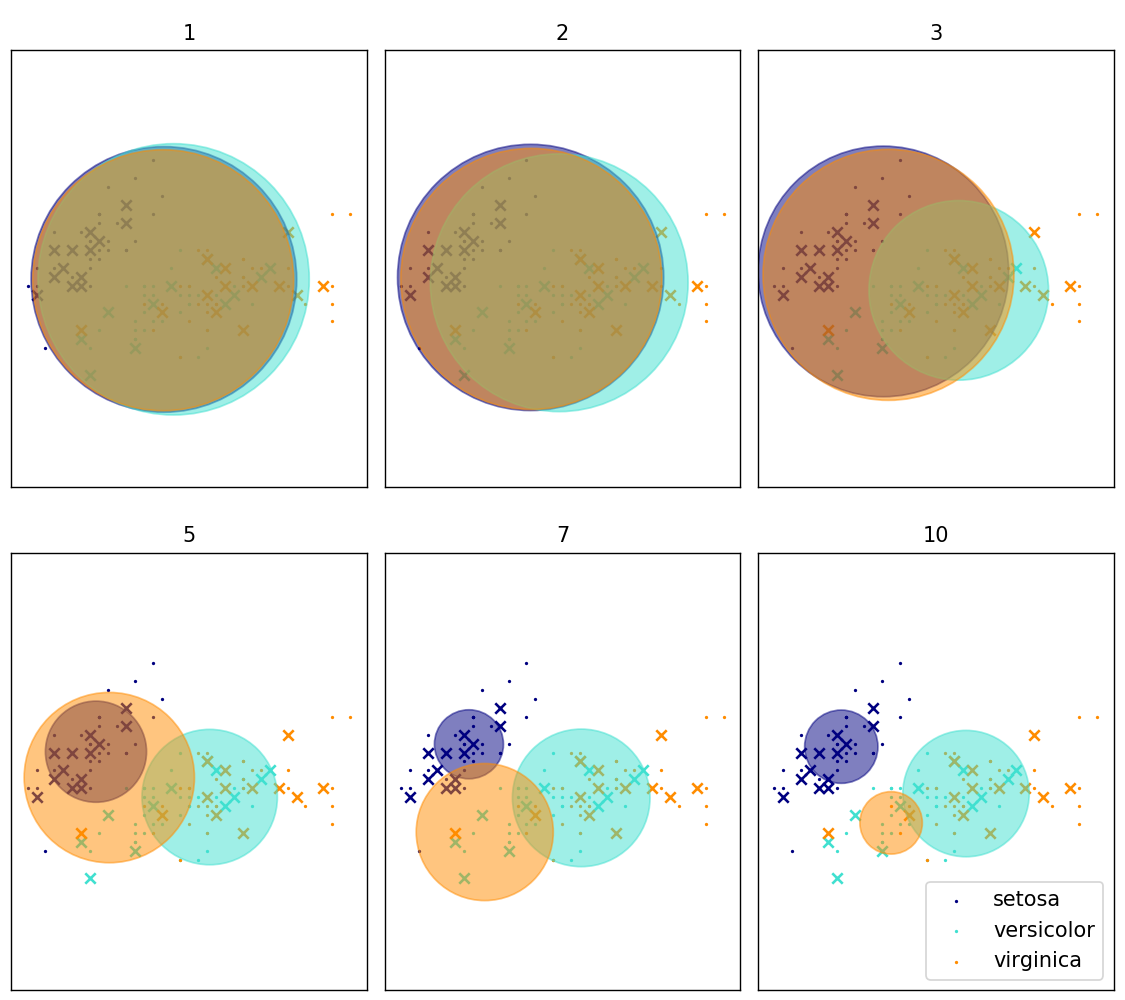

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [7]:
iterations = [1,2,3,5, 7, 10]
       
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type="spherical", init_params="random", n_init=1, max_iter=cov_type, random_state=100)
              for cov_type in iterations}

n_estimators = len(estimators)
plt.figure(figsize=(3 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()

### Visualization of the iterations for a GMM with a diagonal covariance matric

<IPython.core.display.Javascript object>


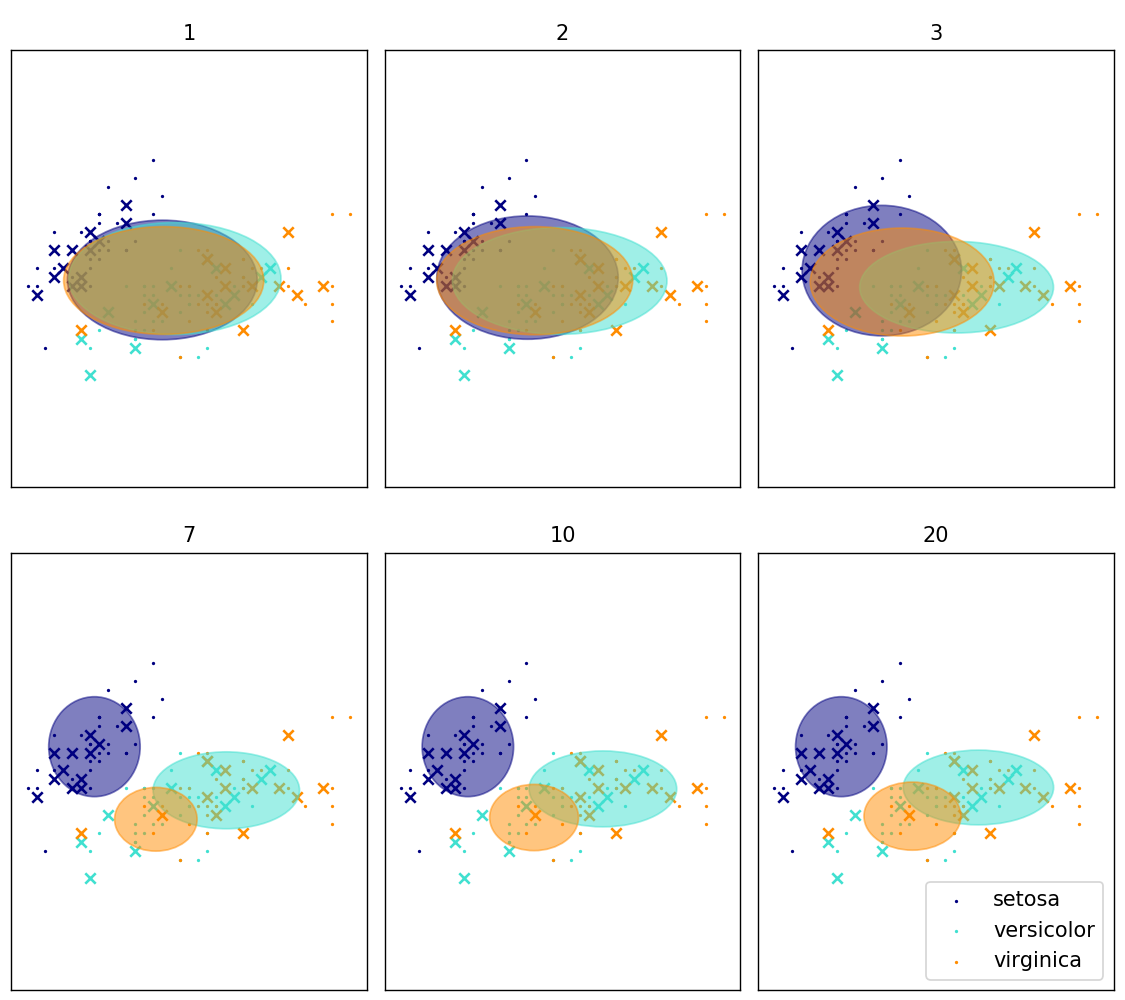

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [8]:
iterations = [1,2,3,7, 10, 20]
       
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type="diag", init_params="random", n_init=1, max_iter=cov_type, random_state=100)
              for cov_type in iterations}
n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])

    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()

### Visualization of the iterations for a GMM with a full covariance matric

<IPython.core.display.Javascript object>


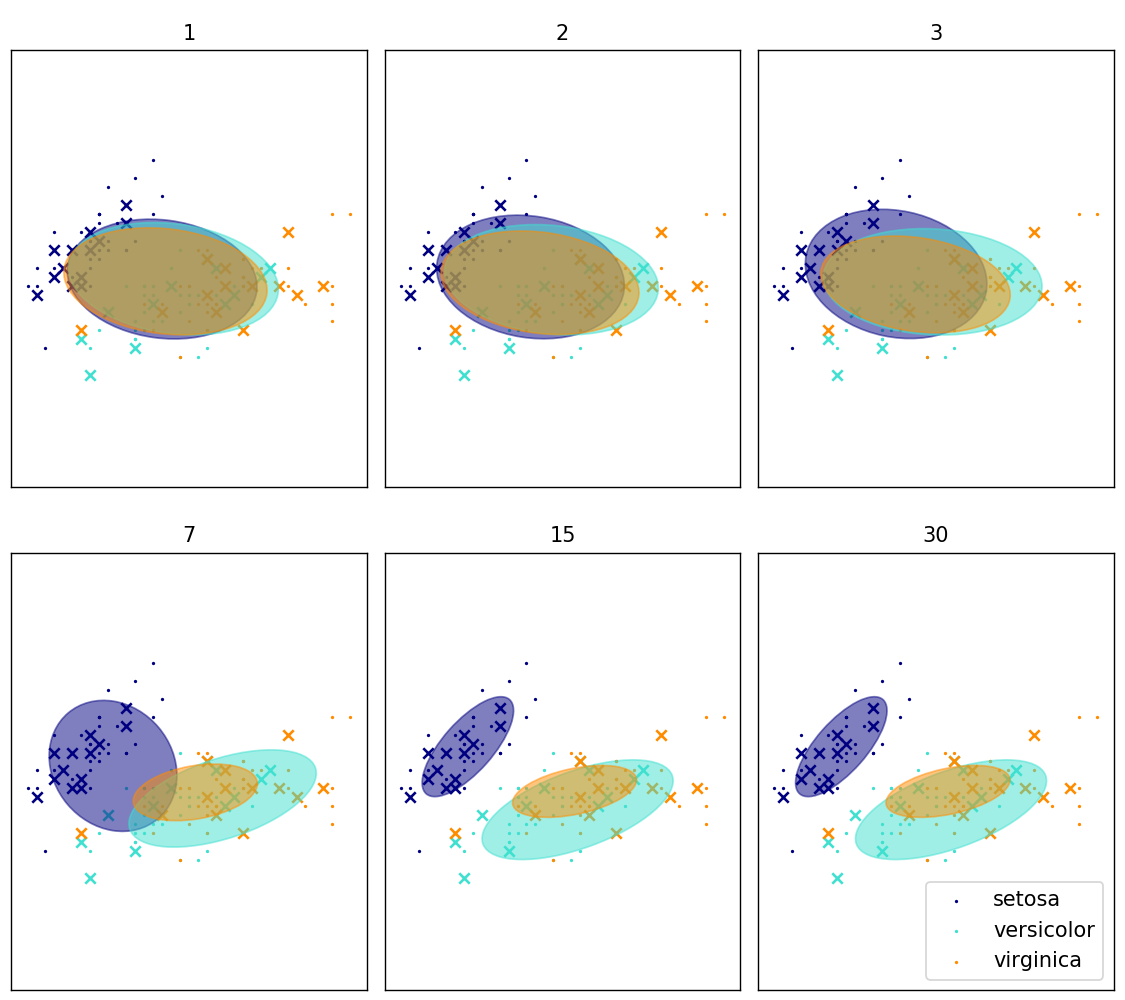

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [9]:
iterations = [1,2,3,7, 15, 30]
       
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type="full", init_params="random", n_init=1, max_iter=cov_type, random_state=100)
              for cov_type in iterations}
n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])

    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()

## We plot the iterations of the k-means for different random initializations of the parameters on a simulated dataset

<IPython.core.display.Javascript object>


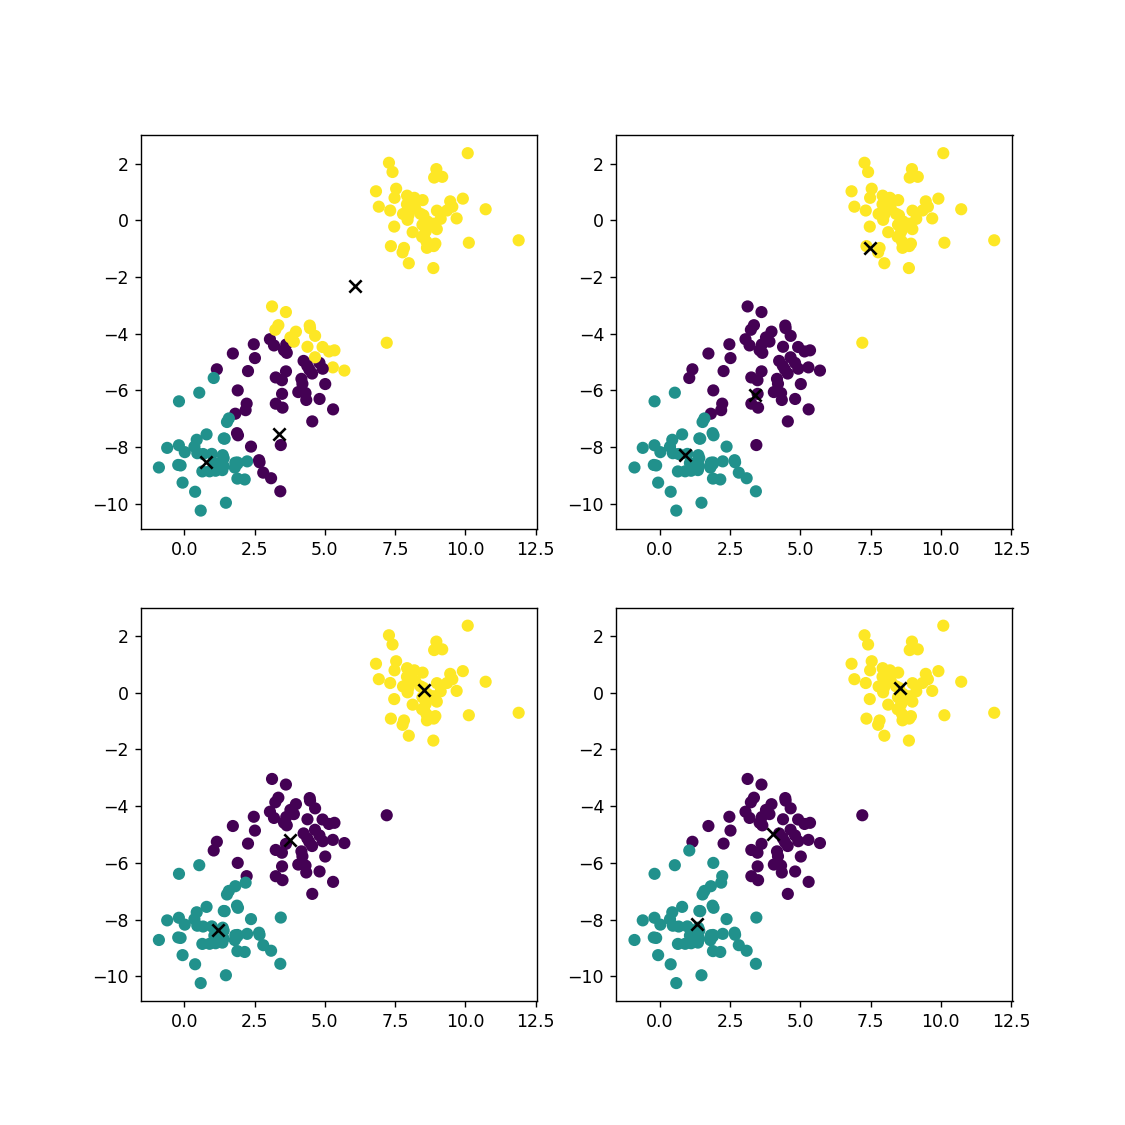

In [10]:
n_samples = 150
random_state = 180
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

iterations = [1,2,3,10]

fig2 = plt.figure(figsize=(9, 9))
plt.title("K-means iterations")
for i in range(len(iterations)):
    plt.subplot(2, 2, i+1)
    estimator = KMeans(init='random', n_clusters=3, random_state=170, n_init=1, max_iter=iterations[i])
    y_pred = estimator.fit_predict(X) 

    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

### Bad initialization leads to bad final clusters

<IPython.core.display.Javascript object>


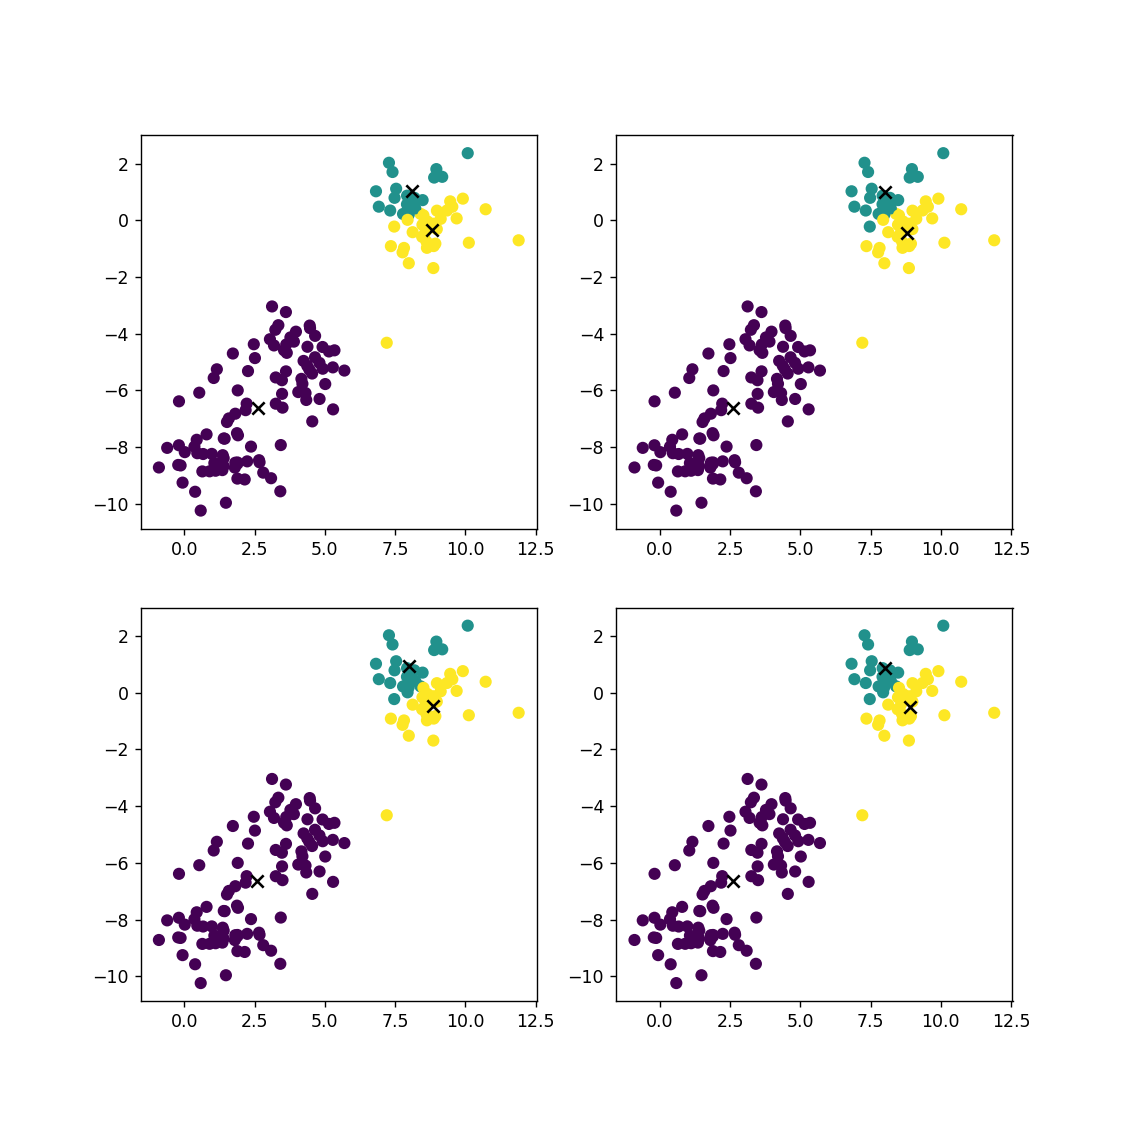

In [11]:
n_samples = 150
random_state = 180
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

iterations = [1,2,3,10]

fig2 = plt.figure(figsize=(9, 9))
plt.title("K-means iterations")
for i in range(len(iterations)):
    plt.subplot(2, 2, i+1)
    estimator = KMeans(init='random', n_clusters=3, random_state=15, n_init=1, max_iter=iterations[i])
    y_pred = estimator.fit_predict(X) 

    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

### Using the k-means++ algorithm for initialization can severely help this problem as well as lower the number of initializations needed (In the example below, the algorithm has converged from the start)

<IPython.core.display.Javascript object>


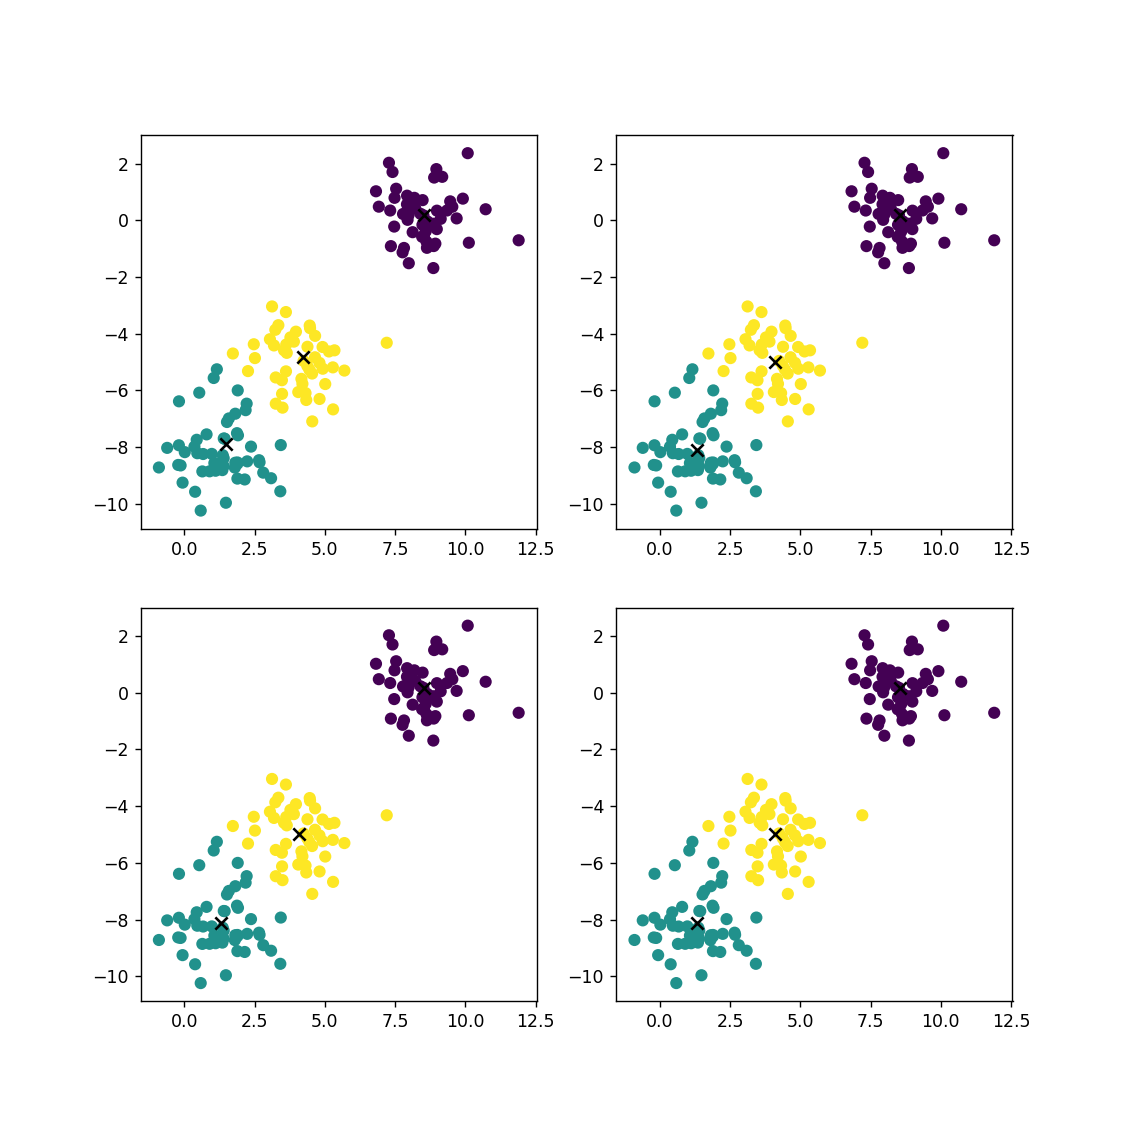

In [12]:
n_samples = 150
random_state = 180
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

iterations = [1,2,3,10]

fig2 = plt.figure(figsize=(9, 9))
plt.title("K-means iterations")
for i in range(len(iterations)):
    plt.subplot(2, 2, i+1)
    estimator = KMeans(init='k-means++', n_clusters=3, random_state=170, n_init=1, max_iter=iterations[i])
    y_pred = estimator.fit_predict(X) 
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

## Model selection

### For probabilistic models (such as GMM) we can calculate the BIC score for each model. The one with the lowest score should be the best. In the example below, we can see that the lowest BIC score is for a GMM model with a full covariance matrix (since the clusters are obviously with different covariances) and the number of clusters K=2 

<IPython.core.display.Javascript object>


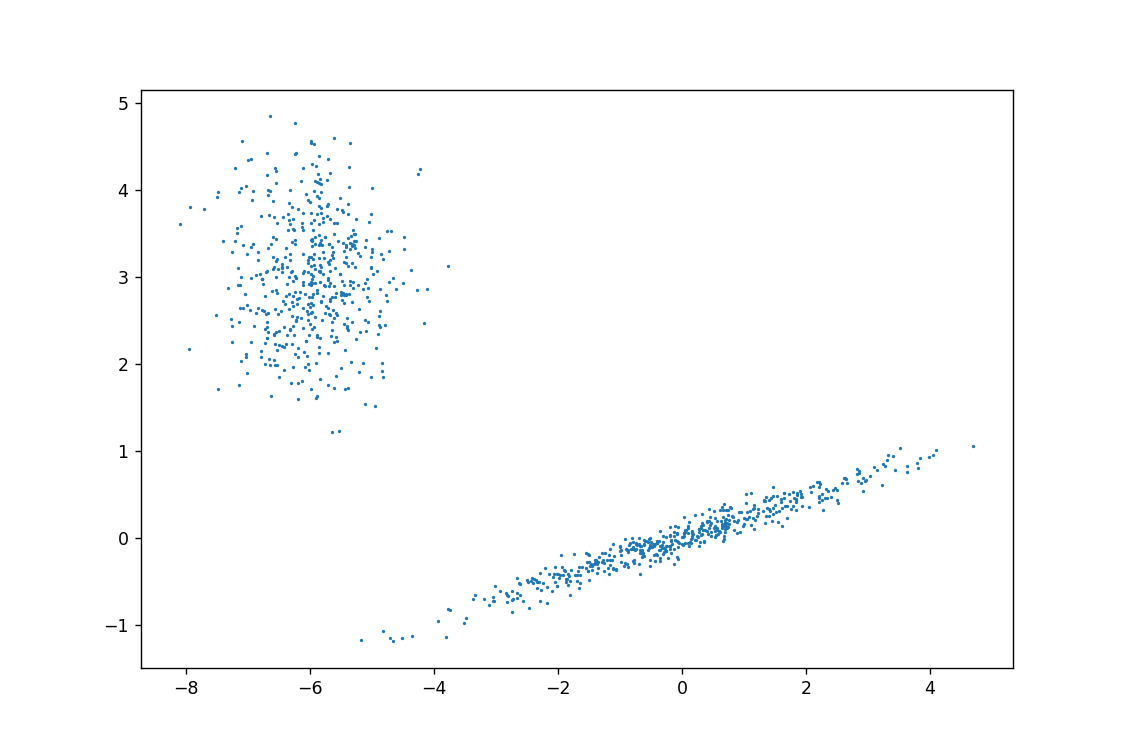

<IPython.core.display.Javascript object>


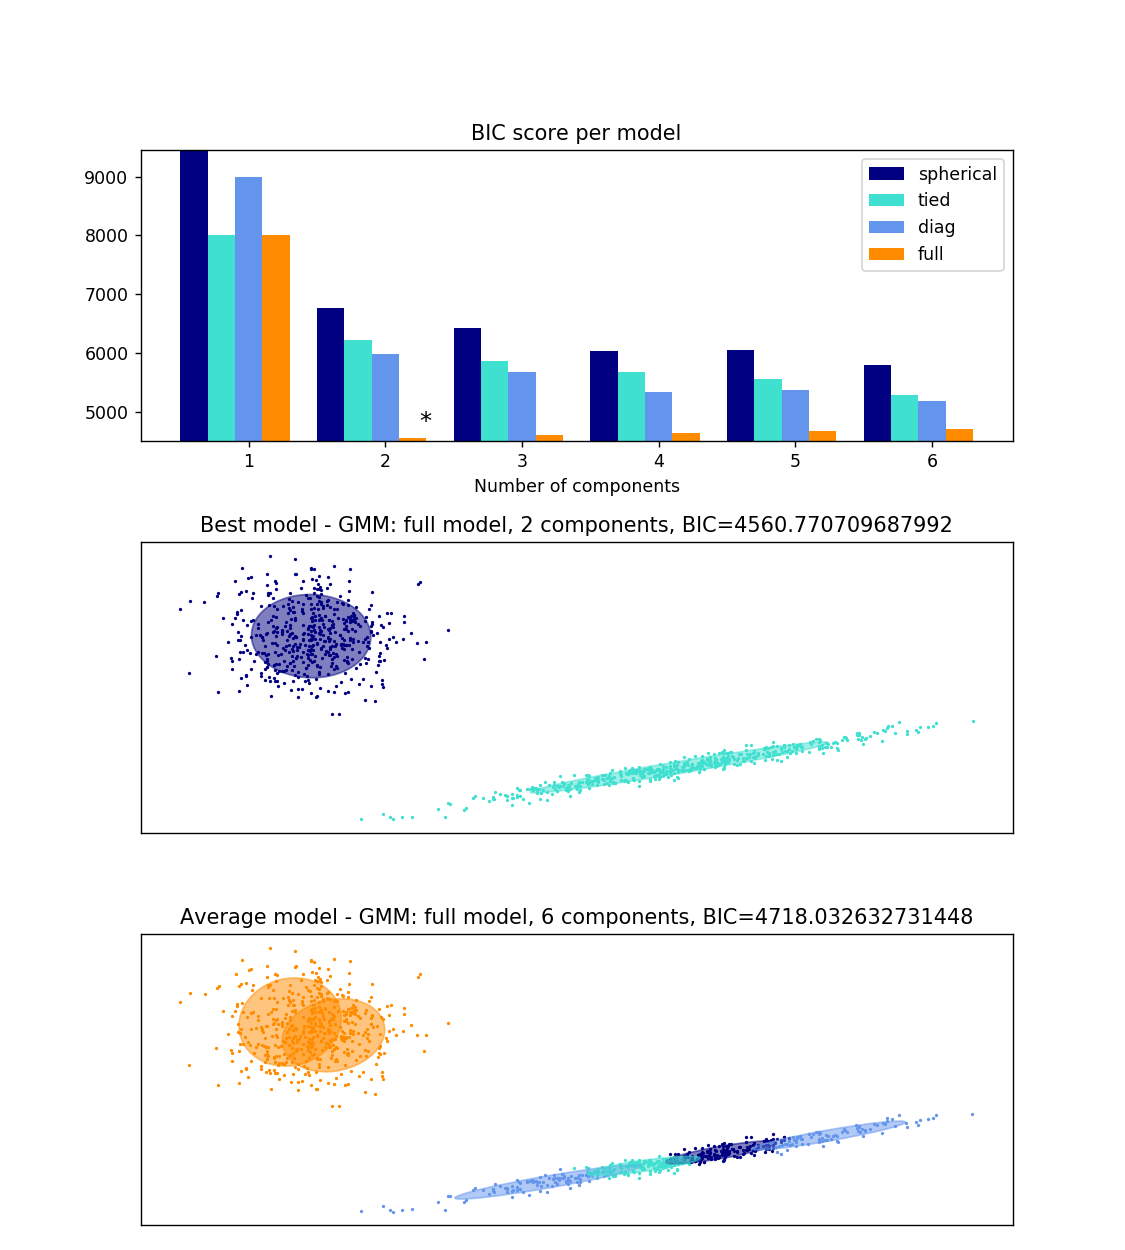

In [13]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])x`
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], .8)
plt.show("The data")
plt.show()

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(9, 10))
spl = plt.subplot(3, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(3, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
plt.xticks(())
plt.yticks(())
plt.title('Best model - GMM: full model, 2 components, BIC='+str(clf.bic(X)))
plt.subplots_adjust(hspace=.35, bottom=.02)

average_gmm = GaussianMixture(n_components=6,
                                      covariance_type="full")
average_gmm.fit(X)
splot = plt.subplot(3, 1, 3)
Y_ = average_gmm.predict(X)
for i, (mean, cov, color) in enumerate(zip(average_gmm.means_, average_gmm.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
    
plt.xticks(())
plt.yticks(())
plt.title('Average model - GMM: full model, 6 components, BIC='+str(average_gmm.bic(X)))
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

## For non-probabilistic methods (such as K-means) the easiest way to find the best K is to plot the Within Cluster Variation (or Sum of Squared Errors) and the Between Cluster Variation and try to find an elbow in the WCV, with the BCV remaining high

<IPython.core.display.Javascript object>


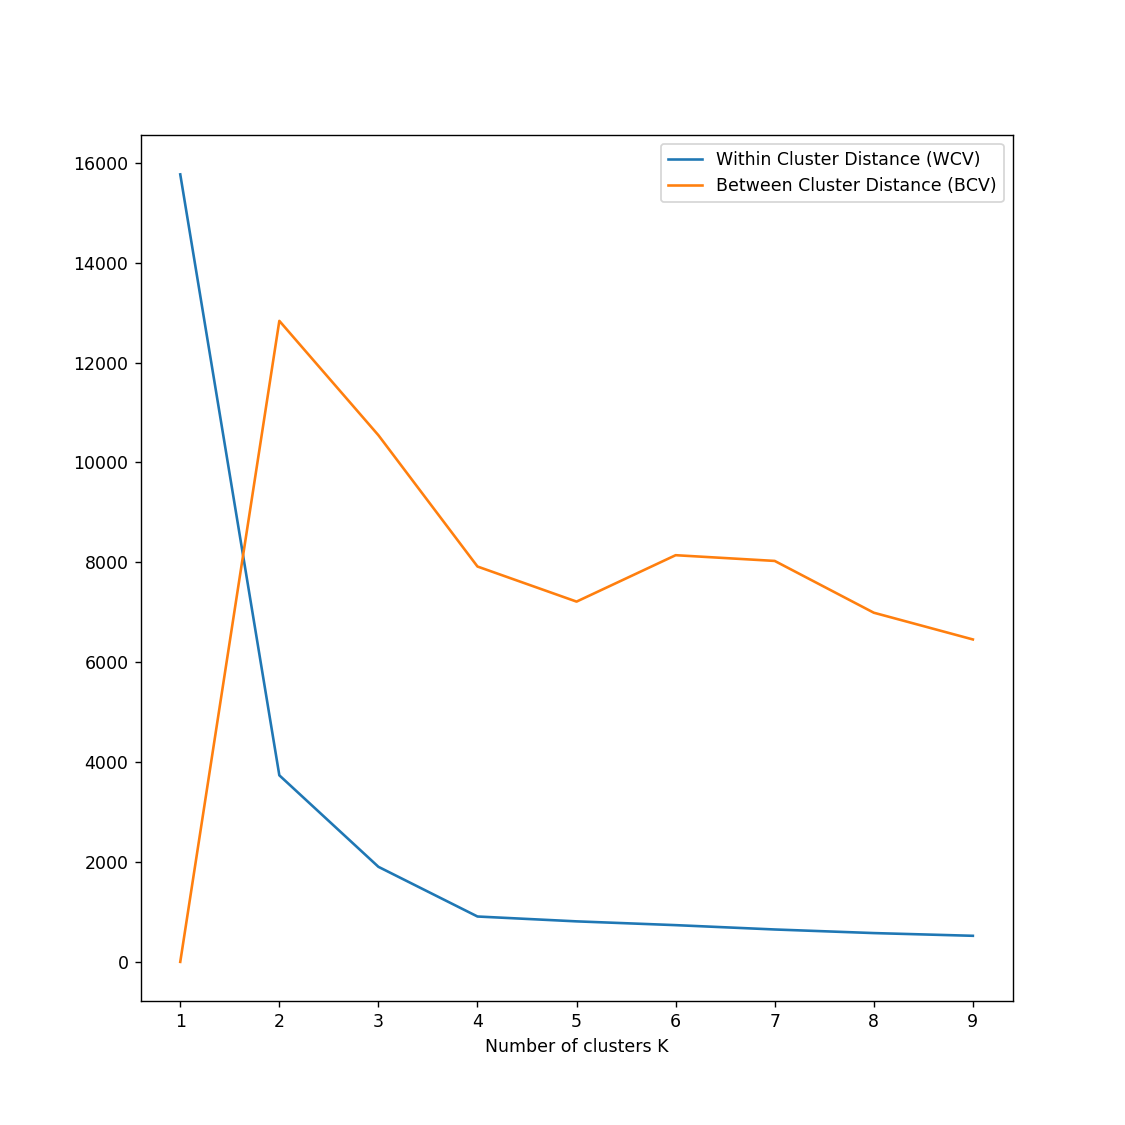

In [14]:
fig1 = plt.figure(figsize=(9, 9))
wcv = {}
bcv = {}
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(X)
    wcv[k] = kmeans.inertia_ 
    centers = kmeans.cluster_centers_
    BCV = 0
    for i in range(len(centers)):
        for j in range(len(centers)):
            BCV += distance.euclidean(centers[i], centers[j])**2
    if(k==1):
        bcv[1] = 0
    else:
        bcv[k] = BCV/(k*(k-1))*100
plt.plot(list(wcv.keys()), list(wcv.values()), label="Within Cluster Distance (WCV)")
plt.plot(list(bcv.keys()), list(bcv.values()), label="Between Cluster Distance (BCV)")
plt.xlabel("Number of clusters K")
plt.legend()
plt.show()
